# Milestone 2 Phase 2

# I. Introduction

Nama  : Mathilda Hosiana Tambun

Batch : HCK 006

## Background


Kanker kulit melanoma merupakan jenis kanker kulit yang mematikan. Setiap tahun, ribuan orang di seluruh dunia terkena melanoma dan angka kematian cukup tinggi. Deteksi dini dan pengobatan yang tepat sangat penting untuk menyelamatkan lebih banyak nyawa.

Untuk meningkatkan deteksi dini dan akurasi diagnosis melanoma, model deep learning diharapkan mampu mengidentifikasi melanoma lebih cepat dan lebih akurat dalam mengklasifikasikan melanoma sebagai "ganas" atau "jinak" dengan menggunakan gambar kulit sebagai referensi.

Dengan penggunaan dataset ini, diharapkan kita dapat mempercepat deteksi melanoma dan meningkatkan tingkat kesembuhan. Hal ini dapat membantu mengurangi angka kematian akibat melanoma dan menyelamatkan lebih banyak nyawa.

## Problem Statement

Rumah sakit mayapada ingin mengklasifikasi antara kulit melanoma ganas dan jinak menggunakan 9.600 gambar dengan tingkat akurasi yang tinggi. Untuk meningkatkan deteksi dini melanoma bisa menyelematkan banyak nyawa dan memberikan kontribusi pada penanganan kanker kulit melanoma secara efektif dimasa yang akan datang.

## Dataset explanation

 Dataset yang saya gunakan adalah https://www.kaggle.com/datasets/hasnainjaved/melanoma-skin-cancer-dataset-of-10000-images

Dataset terdiri dari 9600 gambar untuk pelatihan model dan 1000 gambar untuk evaluasi model. dataset ini berisi dua kelas kanker melanoma, ganas dan jinak.

## Objective

Tujuan menggunakan Dataset Kanker Kulit Melanoma adalah mengembangkan model deep learning yang akurat untuk mengklasifikasikan kanker kulit benign atau malignant. Dataset terdiri dari 10.000 gambar dan 9.600 untuk pelatihan dan 1.000 untuk evaluasi kinerja model. Dengan model ini, diharapkan dapat meningkatkan deteksi dini kanker melanoma serta memberikan dampak positif dalam dunia medis.


# II. Import Libraries

In [1]:
# Data Loading
import os
import glob
import pandas as pd
import numpy as np

# EDA
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns
import cv2

# model
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras import layers
from tensorflow.keras.layers import Dense, Dropout, Conv2D, MaxPooling2D, Flatten, Input
from sklearn.metrics import accuracy_score, classification_report
from keras.callbacks import EarlyStopping,ModelCheckpoint

# For Train-Test Split
from sklearn.model_selection import train_test_split

# For model evaluation
from sklearn.metrics import confusion_matrix, classification_report, precision_score, recall_score, accuracy_score, f1_score, ConfusionMatrixDisplay

In [2]:
#Mengakses dataset langsung dari kaggle dataset sehingga tidak diperlukan proses mendownload file dataset ke local.
from google.colab import files
!pip install -q kaggle
uploaded = files.upload()
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!ls ~/.kaggle
!ls -l ~/.kaggle
!cat ~/.kaggle/kaggle.json
import matplotlib.pyplot as plt
import numpy as np
import glob

Saving kaggle.json to kaggle.json
kaggle.json
total 4
-rw------- 1 root root 70 Aug  5 06:41 kaggle.json
{"username":"mathildatambun","key":"a66d0c3dd3e28db92afc81fe7c972354"}


Pada bagian ini, kita akan melakukan proses data loading dari Kaggle dataset tanpa perlu mengunduh file dataset ke lokal. Langkah-langkah yang akan dilakukan adalah mengakses dataset dari Kaggle, mengecek daftar direktori dan file yang ada dalam dataset, mendefinisikan path untuk data train dan test, serta memeriksa jumlah dataset dalam setiap label (jinak dan ganas). Dengan menggunakan cara ini, kita dapat melanjutkan eksplorasi data tanpa perlu menyimpan dataset di local terlebih dahulu.

In [3]:
#Donwload dataset
!kaggle datasets download -d hasnainjaved/melanoma-skin-cancer-dataset-of-10000-images

 92% 91.0M/98.7M [00:01<00:00, 91.0MB/s]
100% 98.7M/98.7M [00:01<00:00, 75.1MB/s]


In [4]:
#Unzip dataset
!unzip -q /content/melanoma-skin-cancer-dataset-of-10000-images.zip

In [5]:
#Mengecek list direktori yang ada dalam dataset
os.listdir('/content/melanoma_cancer_dataset')

['test', 'train']

Dataset ini sudah dalam bentuk train dan test jadi saat preprocess tidak perlu melakukan split nanti untuk data validation kita ambil atau split dati data train

In [6]:
# path dataset
main_path ='/content/melanoma_cancer_dataset'

# path data train
train_path = os.path.join(main_path, 'train')

# path data test
test_path = os.path.join(main_path, 'test')

Penggunaan kode os.path.join untuk menggabungkan main path dengan path untuk data train dan data test. Hasil penggabungan ini akan disimpan dalam dua variabel, yaitu train_path dan test_path.

In [7]:
# check the number of datasets in train
print('train set: \n' + '='*30)
label_benign = len(os.listdir(os.path.join(train_path, 'benign')))
label_malignant = len(os.listdir(os.path.join(train_path, 'malignant')))
print(f'jumlah data train benign = {label_benign}')
print(f'jumlah data train malignant = {label_malignant}')

train set: 
jumlah data train benign = 5000
jumlah data train malignant = 4605


Ini adalah kode yang berfungsi menampilkan data dari variabel train_path dengan jumlah train untuk benign sebesar 5000 gambar dan untuk malignant 4605

In [8]:
# check the number of datasets in test
print('test set: \n' + '='*30)
label_benign = len(os.listdir(os.path.join(test_path, 'benign')))
label_malignant = len(os.listdir(os.path.join(test_path, 'malignant')))
print(f'jumlah data test benign = {label_benign}')
print(f'jumlah data test malignant = {label_malignant}')

test set: 
jumlah data test benign = 500
jumlah data test malignant = 500


Dan untuk dataset dari Test terdapat 1000 gambar

# III. Exploratory Data Analysis (EDA)

In [9]:
# mengambil list yang ada di gambar

# pada data train
train_benign = glob.glob(train_path + '/benign/*.jpg')
train_malignant = glob.glob(train_path + '/malignant/*.jpg')

# pada data test
test_benign = glob.glob(test_path + '/benign/*.jpg')
test_malignant = glob.glob(test_path + '/malignant/*.jpg')

kode diatas hasil outputnya digunakan untuk mengambil daftar file gambar (berkas JPG) yang ada di dalam direktori data train dan data test untuk kedua kelas

In [10]:
#Melihat nama data gambar
train_benign[:5]

['/content/melanoma_cancer_dataset/train/benign/melanoma_4370.jpg',
 '/content/melanoma_cancer_dataset/train/benign/melanoma_2381.jpg',
 '/content/melanoma_cancer_dataset/train/benign/melanoma_607.jpg',
 '/content/melanoma_cancer_dataset/train/benign/melanoma_4050.jpg',
 '/content/melanoma_cancer_dataset/train/benign/melanoma_1331.jpg']

Sekilas menampilkan nama gambar dari data train untuk jenis penyakit benign

In [11]:
# function to include data images in a dataframe
def create_df(list_images):
    data = []
    for image in list_images:
        label = os.path.basename(os.path.dirname(image))
        data.append((image, label))
    return pd.DataFrame(data, columns=['images', 'label'])

In [12]:
# dataframe train
train_df= create_df(train_benign + train_malignant)
train_df= train_df.sample(frac=1, random_state=42).reset_index(drop=True)

# dataframe test
test_df= create_df(test_benign + test_malignant)
test_df= test_df.sample(frac=1, random_state=42).reset_index(drop=True)

Fungsi kode diatas untuk menggabungkan dari gambar benign dan gambar malignant baik untuk data train dan data test

In [13]:
# check shape dataframe
print('Size data train', train_df.shape)
print('Size data test', test_df.shape)

Size data train (9605, 2)
Size data test (1000, 2)


Dan untuk shape dari data train hasilnya 9605 dan untuk data test 1000

In [14]:
# show data train
train_df.tail()

images      label
9600  /content/melanoma_cancer_dataset/train/maligna...  malignant
9601  /content/melanoma_cancer_dataset/train/maligna...  malignant
9602  /content/melanoma_cancer_dataset/train/maligna...  malignant
9603  /content/melanoma_cancer_dataset/train/benign/...     benign
9604  /content/melanoma_cancer_dataset/train/maligna...  malignant

In [15]:
# show value counts
train_df['label'].value_counts()

benign       5000
malignant    4605
Name: label, dtype: int64

Label merupakan target dari dataset ini

In [16]:
# Show basic info of the data train
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9605 entries, 0 to 9604
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   images  9605 non-null   object
 1   label   9605 non-null   object
dtypes: object(2)
memory usage: 150.2+ KB


In [17]:
# show data test
test_df.tail()

images      label
995  /content/melanoma_cancer_dataset/test/benign/m...     benign
996  /content/melanoma_cancer_dataset/test/benign/m...     benign
997  /content/melanoma_cancer_dataset/test/malignan...  malignant
998  /content/melanoma_cancer_dataset/test/benign/m...     benign
999  /content/melanoma_cancer_dataset/test/benign/m...     benign

In [18]:
# show value counts
test_df['label'].value_counts()

malignant    500
benign       500
Name: label, dtype: int64

In [19]:
# Show basic info of the data test
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   images  1000 non-null   object
 1   label   1000 non-null   object
dtypes: object(2)
memory usage: 15.8+ KB


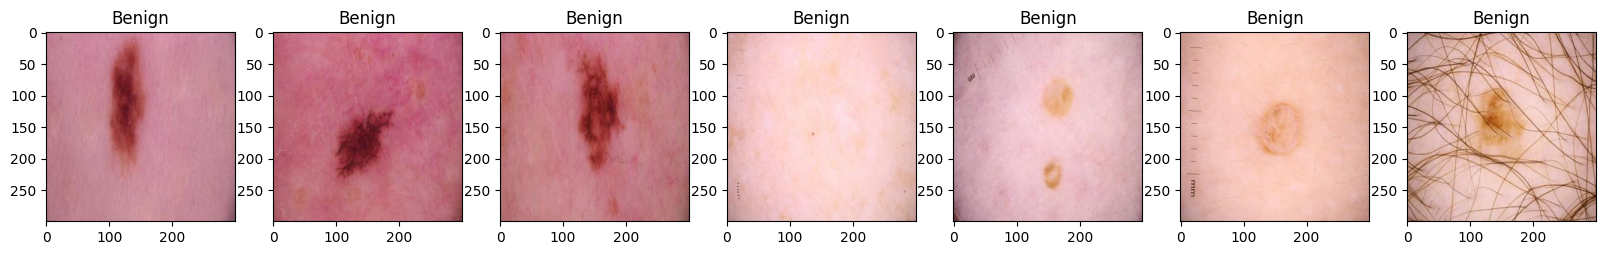

In [20]:
# menampilkan data train dari Benign
fig,ax = plt.subplots(ncols=7,figsize=(20,5))
for i in range(7):
  cat = plt.imread(train_benign[i])
  ax[i].imshow(cat)
  ax[i].set_title('Benign')

Inilah gambar jenis tumor benign yang cenderung tumbuhnya agak lambat dan sekilas terlihat seperti gambar tahi lalat. Jenis tumor ini memang tidak terlalu berbahaya namun dapat mempengaruhi kesehatan seperti pembengkakan pada area tubuh tertentu dan sangat mengganggu apabila tumbuhnya di bagian yang terekspos orang banyak.

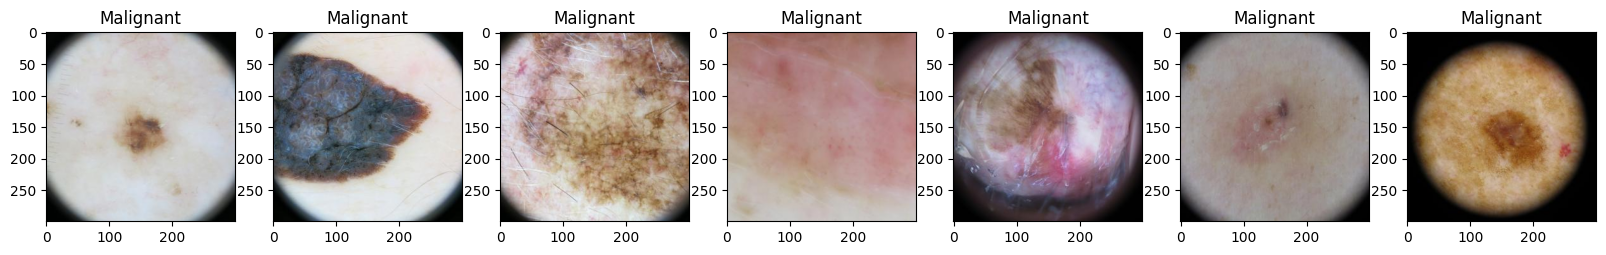

In [21]:
# menampilkan data train dari Malignant
fig, ax = plt.subplots(ncols=7, figsize=(20, 5))
for i in range(7):
    cat = plt.imread(train_malignant[i])
    ax[i].imshow(cat)
    ax[i].set_title('Malignant')

hasil output gambar malignant adalah sebuah tumor yang bersifat kanker ganas dan cenderung menyebar ke area organ lain dalam tubuh. Sel tumor kanker ganas dapat tumbuh secara tidak terkontrol dan menyerang jaringan sehat di sekitarnya dimana tumor ganas yang tidak diobati atau tidak dikelola dengan baik dapat menyebabkan masalah serius dan berisiko mengancam nyawa. Bila kita lihat dari ketujuh gambar ini memang bentuknya lebih agak lebih kontras dan harus di edukasi agar penderita malignant mendapat penanganan lebih lanjut dari pihak tim medis


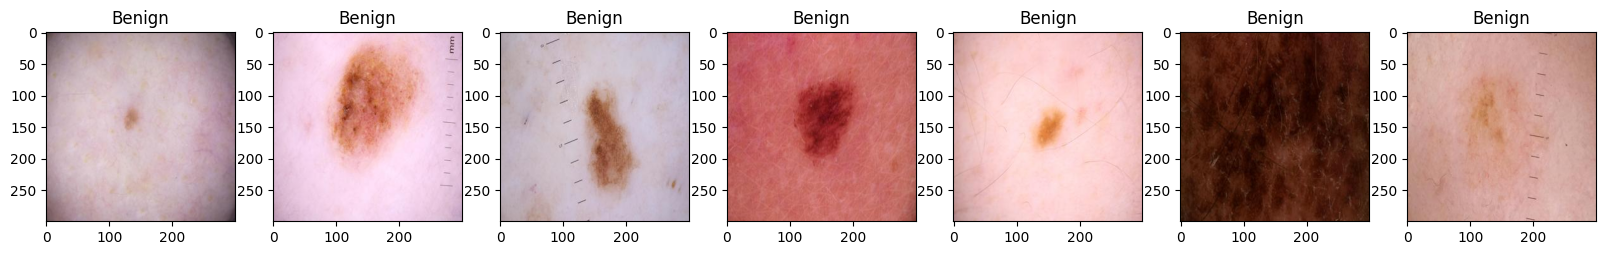

In [22]:
# menampilkan data test dari Benign
fig,ax = plt.subplots(ncols=7,figsize=(20,5))
for i in range(7):
  cat = plt.imread(test_benign[i])
  ax[i].imshow(cat)
  ax[i].set_title('Benign')

Dan untuk data test secara overview gambarnya menamilkan ada yg sangat kontars seperti bekas luka ada juga yang seperti bintik tersamar dengan ciri-ciri warna orange ke coklat.

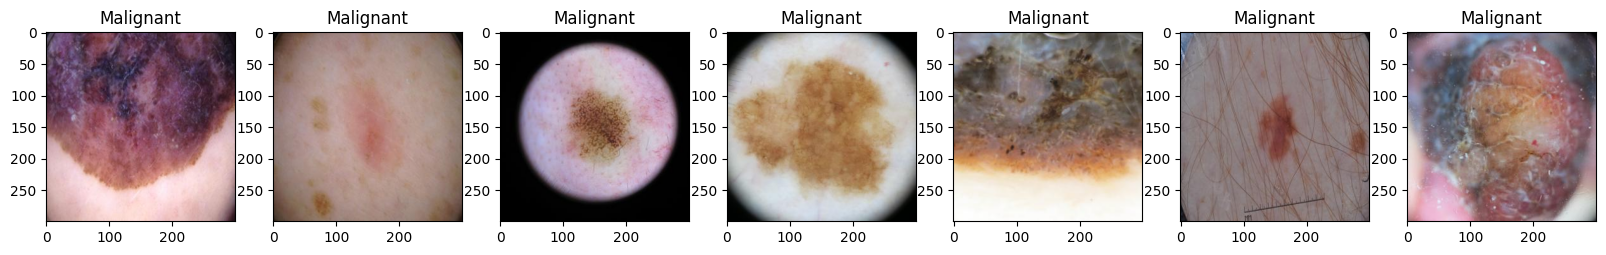

In [24]:
# menampilkan data test dari Malignant
fig,ax = plt.subplots(ncols=7,figsize=(20,5))
for i in range(7):
  cat = plt.imread(test_malignant[i])
  ax[i].imshow(cat)
  ax[i].set_title('Malignant')

Dan untuk data train gambar malignant atau kanker ganas ini bentuknya sangat mengerikkan dan ada juga yang seperi gambar beging. Inti dari klasifikasi kita berhasil membedakan atau membuat klasifikasi malignant dan benign.

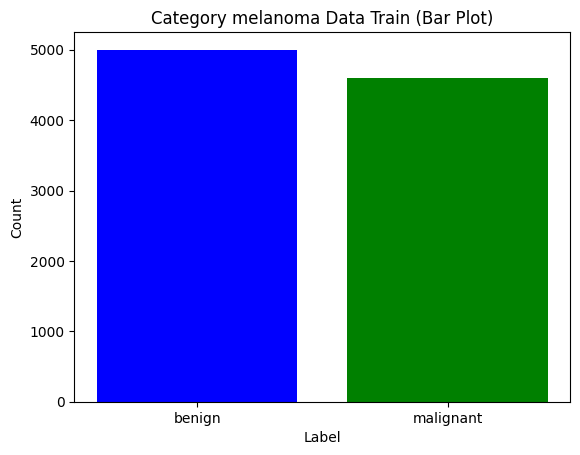

In [23]:
#Visualisasi Train
value_counts = train_df['label'].value_counts()
labels = value_counts.index
counts = value_counts.values

colors = ['blue', 'green', 'red', 'purple', 'orange']  # Daftar warna sesuai jumlah kategori

plt.bar(labels, counts, color=colors)
plt.xlabel('Label')
plt.ylabel('Count')
plt.title('Category melanoma Data Train (Bar Plot)')
plt.show()

Untuk data train kita dapat melihat kalo jumlah gambar pada benign lebih bnyak dari pada malignant. Artiinya lebih banyak yang menderita tumor benign daripada malignant

benign       5000
malignant    4605
Name: label, dtype: int64


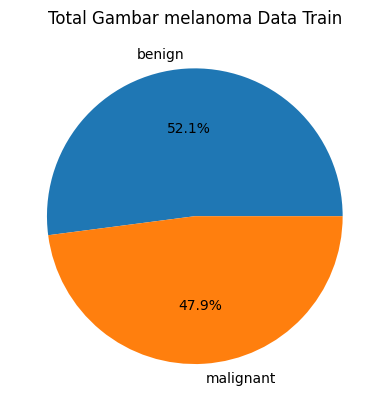

In [25]:
# Menghitung jumlah masing-masing nilai di kolom 'label'
value_counts = train_df['label'].value_counts()
print(value_counts)

# Memplot hasil dalam bentuk diagram pie
value_counts.plot(kind='pie', autopct='%1.1f%%')
plt.title('Total Gambar melanoma Data Train')
plt. ylabel("")
plt.show()


Mayoritas orang dengan penyakit tumor memiliki jenis tumor benign, sekitar 52.1%. Meskipun tumor benign lebih umum, kita harus tetap berhati-hati karena meskipun tidak ganas, mereka bisa menyebabkan masalah jika tumbuh besar atau menekan organ.

Sebaliknya, sekitar 47.9% orang memiliki tumor malignant, yang merupakan jenis tumor kanker. Tumor kanker ini memiliki risiko lebih tinggi dan bisa menjadi serius jika tidak ditangani dengan baik. Penting untuk mendeteksi sejak dini dan mendapatkan perawatan yang tepat untuk meningkatkan kesembuhan.

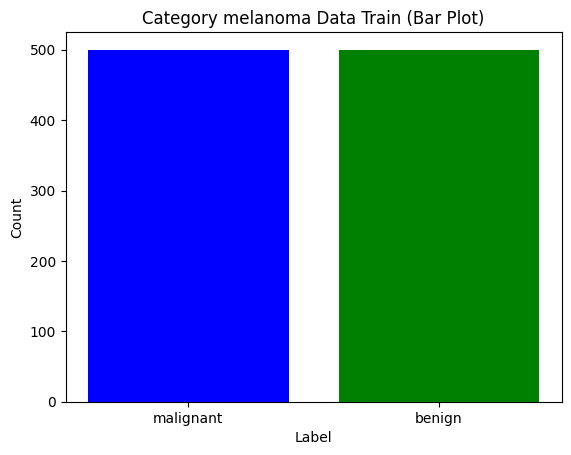

In [26]:
#Visualisasi Test
value_counts = test_df['label'].value_counts()
labels = value_counts.index
counts = value_counts.values

colors = ['blue', 'green', 'red', 'purple', 'orange']  # Daftar warna sesuai jumlah kategori

plt.bar(labels, counts, color=colors)
plt.xlabel('Label')
plt.ylabel('Count')
plt.title('Category melanoma Data Train (Bar Plot)')
plt.show()

Dan untuk data test nilainya sama antara jumlah gambar malignant dan benign

malignant    500
benign       500
Name: label, dtype: int64


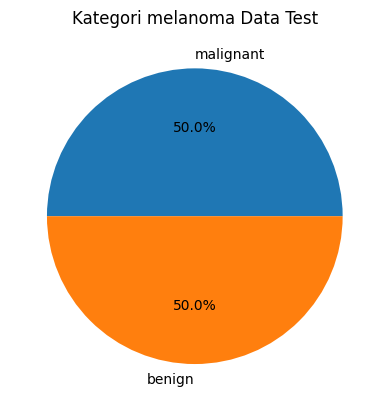

In [27]:
# Menghitung jumlah masing-masing nilai di kolom 'label'
value_counts = test_df['label'].value_counts()
print(value_counts)

# Memplot hasil dalam bentuk diagram pie
value_counts.plot(kind='pie', autopct='%1.1f%%')
plt.title('Kategori melanoma Data Test')
plt. ylabel("")
plt.show()

Bila pada data test jumlah gambar dari kedua jenis penyakit tersebut sama

## Get Data Inference

In [28]:
# mengambil sample data untuk inference
inf_df = train_df.sample(10, random_state=42)
inf_df

images      label
119   /content/melanoma_cancer_dataset/train/maligna...  malignant
1149  /content/melanoma_cancer_dataset/train/benign/...     benign
8459  /content/melanoma_cancer_dataset/train/benign/...     benign
2083  /content/melanoma_cancer_dataset/train/benign/...     benign
5564  /content/melanoma_cancer_dataset/train/maligna...  malignant
7452  /content/melanoma_cancer_dataset/train/benign/...     benign
3210  /content/melanoma_cancer_dataset/train/benign/...     benign
1833  /content/melanoma_cancer_dataset/train/benign/...     benign
2701  /content/melanoma_cancer_dataset/train/maligna...  malignant
4701  /content/melanoma_cancer_dataset/train/maligna...  malignant

In [29]:
# drop data train untuk inference

df_analys = train_df.drop(inf_df.index)
df_analys

images      label
0     /content/melanoma_cancer_dataset/train/benign/...     benign
1     /content/melanoma_cancer_dataset/train/benign/...     benign
2     /content/melanoma_cancer_dataset/train/maligna...  malignant
3     /content/melanoma_cancer_dataset/train/benign/...     benign
4     /content/melanoma_cancer_dataset/train/maligna...  malignant
...                                                 ...        ...
9600  /content/melanoma_cancer_dataset/train/maligna...  malignant
9601  /content/melanoma_cancer_dataset/train/maligna...  malignant
9602  /content/melanoma_cancer_dataset/train/maligna...  malignant
9603  /content/melanoma_cancer_dataset/train/benign/...     benign
9604  /content/melanoma_cancer_dataset/train/maligna...  malignant

[9595 rows x 2 columns]

In [30]:
# reset index

df_analys.reset_index(drop = True, inplace = True)
inf_df.reset_index(drop = True, inplace = True)

In [31]:
#Setelah di drop saya simpan dalam bentuk CSV
df_inf_csv = inf_df.to_csv('Inference_Mathilda.csv', index=False)
df_inf_csv

# IV. Data Preprocessing (Feature Engineering)

## Split Data

Pada dataset ini karena data antara test dan train sudah terbagi jadi hanya split data untuk data validation dan itu di ambil dari data train.

In [32]:
train_df, val_df = train_test_split(train_df, test_size=0.2, random_state=1, stratify = train_df['label'])
print(train_df.shape)
print(val_df.shape)

(7684, 2)
(1921, 2)


Hasil split untuk data validation di set 0.2 dari data train dan hasilnya 1921 buat data validation

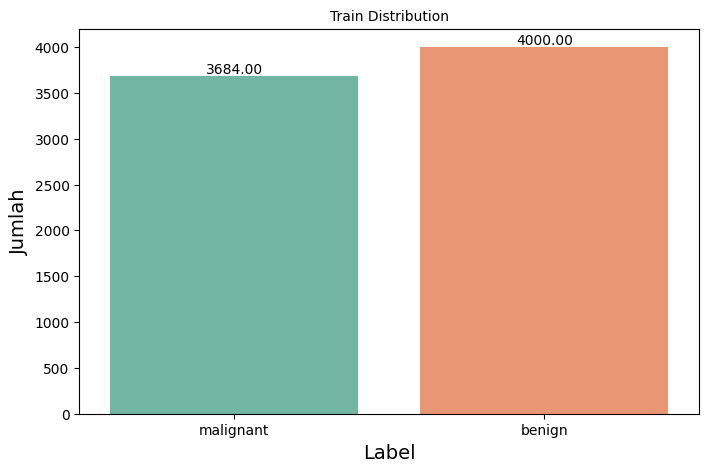

In [33]:
def visualize_data(dataframe, label):
    fig, ax = plt.subplots(figsize =(8, 5))
    ax = sns.countplot(x='label', data=dataframe, palette='Set2')
    ax.set_title('Data Distribution')
    ax.set_xlabel('Label')
    ax.set_ylabel('Count')
    for p in ax.patches:
        ax.annotate(format(p.get_height(), '.2f'),
                   (p.get_x() + p.get_width() / 2,
                    p.get_height()), ha='center', va='center',
                   size=10, xytext=(0, 5),
                   textcoords='offset points')

    # Setting the label for x-axis
    plt.xlabel("Label", size=14)
    # Setting the label for y-axis
    plt.ylabel("Jumlah", size=14)
    # plt title base on name of
    plt.title(f"{label} Distribution", size=10)
    plt.show()

visualize_data(train_df, 'Train')

Ini ada bentuk plot setelah data train di split buat validation yang awalnya 5000 dan 4650 sekarang menjadi data gambar malignant 3684 dan untuk benign 4000

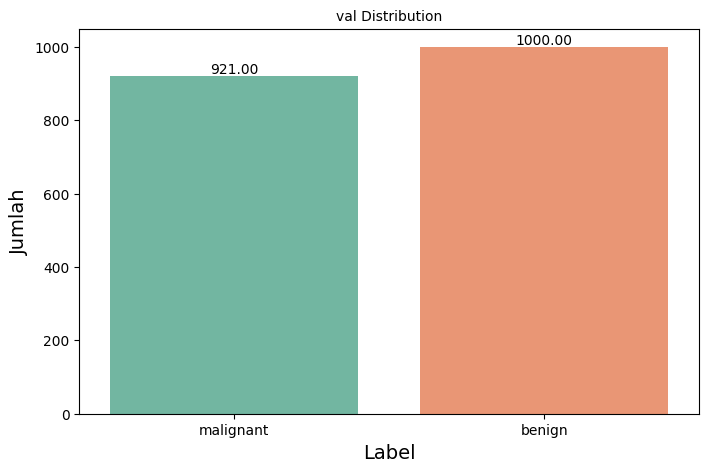

In [34]:
visualize_data(val_df, 'val')

Dan ini adalah plot yang menunjukkan total data untuk validation dari data train setelah di split

## Augmentasi Data

In [35]:
img_height= 240
img_width= 240
batch_size= 64

Kode diatas fungsinya untuk menyamakan size ukuran gambar yang akan kita gunakan agar saat disini saya gunakan nilainya 220 size. Saat mengatur nilai gambar sebaiknya mencapai 400 karena dapat mempengaruhi komputasi.

In [36]:
train_df= tf.keras.preprocessing.image_dataset_from_directory(
    train_path,
    validation_split= 0.2,
    subset='training',
    seed=123,
    image_size=(img_height,img_width),
    batch_size= batch_size
)

val_df = tf.keras.preprocessing.image_dataset_from_directory(
    train_path,
    validation_split= 0.2,
    subset='validation',
    seed=123,
    image_size=(img_height,img_width),
    batch_size= batch_size,
    shuffle=False
)

test_df = tf.keras.preprocessing.image_dataset_from_directory(
    test_path,
    seed=123,
    image_size=(img_height,img_width),
    batch_size= batch_size,
    shuffle=False
)

Found 9605 files belonging to 2 classes.
Using 7684 files for training.
Found 9605 files belonging to 2 classes.
Using 1921 files for validation.
Found 1000 files belonging to 2 classes.


Ini seperti sebuah pipeline dengan membuat ukuran batch sizenya dan penggunaan seed fungsinya saat kita ingin merunning ulang agar nilainya tetap sama. Fungsi shuffle ini digunakakn buat train karena data yang di jadikan uji coba trainnya makanya di test dan val kita input false. Validation split dengan nilai 0.2 itu datanya masuk ke data validasi. Dengan hasil output data yang akan di train 7684, untuk data testnya 1000 dan sisanya buat validasi 1921

In [37]:
print(train_df.class_names)

['benign', 'malignant']


In [38]:
#class malignant labelnya adalah 1 (menunjukkan hasil output)
list_class= train_df.class_names
nama_class= 'malignant'
class_index= list_class.index(nama_class)
print(class_index)

1


In [39]:
#class benign labelnya adalah 0
list_class= train_df.class_names
nama_class= 'benign'
class_index= list_class.index(nama_class)
print(class_index)

0


In [40]:
for image, label in train_df.take(1):
  print('label:', train_df.class_names[label.numpy()[0]])

label: malignant


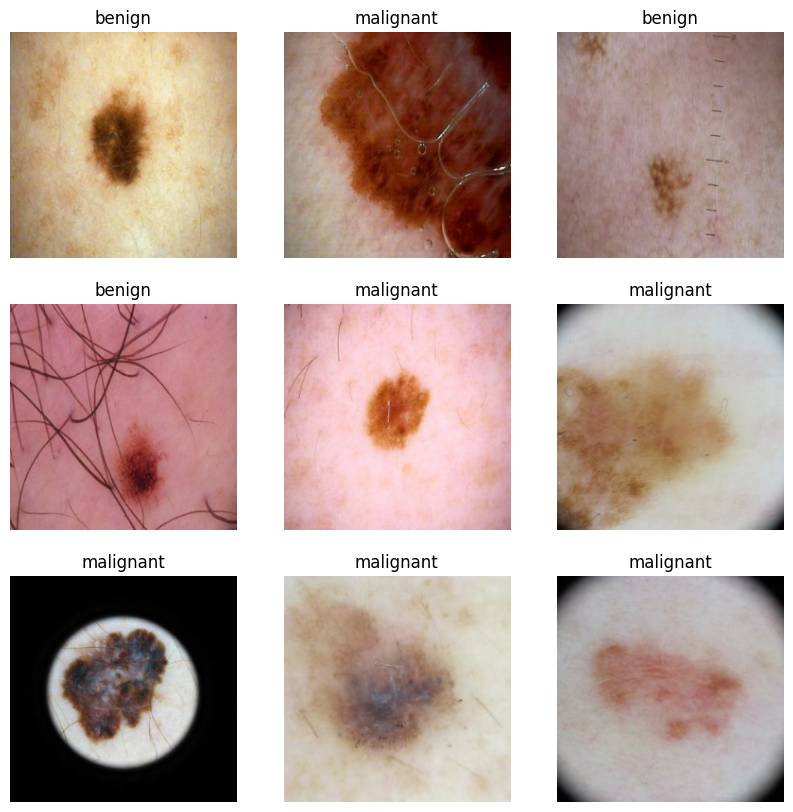

In [41]:
#Menampilkan gambar yang train
plt.figure(figsize=(10,10))
for images, labels in train_df.take(1):
  for i in range(9):
    ax= plt.subplot(3, 3, i+1)
    plt.imshow(images[i].numpy().astype('uint8'))
    plt.title(list_class[labels[i]])
    plt.axis('off')

Ini hasil gambar train yang ukurannya 240 dengan nilai ukuran yang sama.

In [42]:
for image_batch , label_batch in train_df:
  print(image_batch.shape)
  print(label_batch.shape)
  break

(64, 240, 240, 3)
(64,)


Kita memanggil gambar train dan hasil oputnya dari yang sudah kita input di semi pipeline.

# V. Modelling

## Model Sequencial

In [43]:
#Pararel Processing
AUTOTUNE = tf.data.AUTOTUNE
train_df = train_df.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_df = train_df.cache().prefetch(buffer_size=AUTOTUNE)

Fungsi dari pararel processing untuk mempercepat proses ketika running data sebanyak 10.000 gambar

### Model tanpa menggunakan augmentasi dan tidak menggunakan padding

In [44]:
inputs= (img_height, img_width,3)
model = Sequential([
    layers.Rescaling(1./255, input_shape=inputs),
    layers.Conv2D(16 ,3 , padding='valid', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(32 ,3 , padding='valid', activation='relu'),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(units=1, activation='sigmoid')
])

Pada model kita menggunakan scalling untuk mengubah datanya dari 0 sampai 1 menggunakan dua layer konvulusi, 1 hidden layer dan hidden ouput layer

In [45]:
model.compile(optimizer='adam', loss='binary_crossentropy',
              metrics=['accuracy'])

In [46]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 240, 240, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 238, 238, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 119, 119, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 117, 117, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 58, 58, 32)       0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 107648)            0

Hasil dari scalling sama dengan nilai input, layer konvidense pertama kita tanpa menggunakan padding nilainya bertambah, untuk max pooling fungsinya untuk mengurnagi dimensi dari datanya jadi hasilnya akan berkurang dari setengah ukuran gambar sebelumnya dan layer konvidanse kedua 117 setelah di max pooling jd setengahnya.

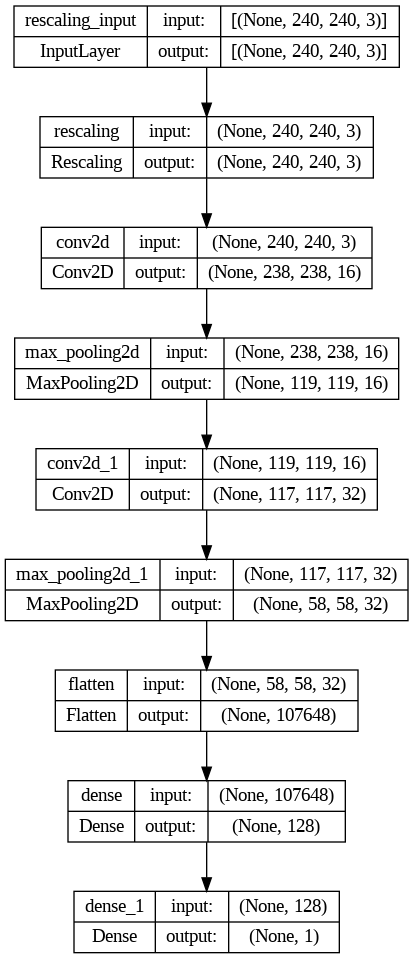

In [47]:
# Plot Layers
tf.keras.utils.plot_model(model, show_shapes=True)

Dengan menggunakan model sequencial yang dirancang diatur secara berurutan dan lebih cocok untuk data simple.

In [48]:
epochs= 10
history_1= model.fit(
    train_df,
    validation_data= val_df,
    epochs=epochs
)

Epoch 1/10
121/121 [==============================] - 31s 77ms/step - loss: 0.7045 - accuracy: 0.7536 - val_loss: 0.3447 - val_accuracy: 0.8467
Epoch 2/10
121/121 [==============================] - 9s 73ms/step - loss: 0.3277 - accuracy: 0.8610 - val_loss: 0.2956 - val_accuracy: 0.8803
Epoch 3/10
121/121 [==============================] - 9s 73ms/step - loss: 0.2855 - accuracy: 0.8809 - val_loss: 0.2531 - val_accuracy: 0.8915
Epoch 4/10
121/121 [==============================] - 9s 75ms/step - loss: 0.2776 - accuracy: 0.8885 - val_loss: 0.2289 - val_accuracy: 0.9090
Epoch 5/10
121/121 [==============================] - 11s 94ms/step - loss: 0.2399 - accuracy: 0.9038 - val_loss: 0.2456 - val_accuracy: 0.8909
Epoch 6/10
121/121 [==============================] - 11s 94ms/step - loss: 0.2238 - accuracy: 0.9092 - val_loss: 0.1891 - val_accuracy: 0.9244
Epoch 7/10
121/121 [==============================] - 9s 72ms/step - loss: 0.2062 - accuracy: 0.9191 - val_loss: 0.1914 - val_accuracy: 0.9

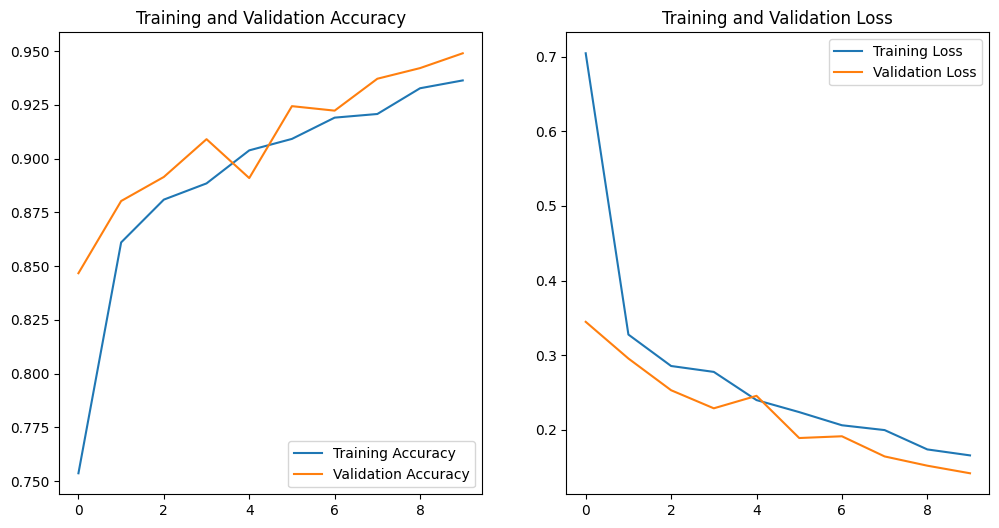

In [49]:
acc = history_1.history['accuracy']
val_acc = history_1.history['val_accuracy']

loss = history_1.history['loss']
val_loss = history_1.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

ternyata pada gambar banyak mengalami ekspoding apalagi kalo sering di running ulang hasilnya lebih ekspoding

In [50]:
test_results_1 = model.evaluate(test_df, verbose=0)
print(f'Test Loss     : {test_results_1[0]:.4f}')
print(f'Test Accuracy : {test_results_1[1]:.4f}')

Test Loss     : 0.3358
Test Accuracy : 0.8890


Berdasarkan hasil preprocess model yang tidak menggunakan augmentasi memiliki akurasi tinggi pada data latihan (93%) tetapi akurasi lebih rendah pada data uji (88%). Hal ini menunjukkan kemungkinan terjadi overfitting pada model tersebut. Peningkatan akurasi pada data latihan yang tinggi bisa disebabkan oleh model secara teliti "menghafal" pola yang ada pada data latihan, bahkan pola-pola kecil yang mungkin tidak umum dan hanya berlaku pada sampel tertentu. Sebagai akibatnya, saat dihadapkan pada data uji yang berbeda, model kesulitan untuk melakukan generalisasi, sehingga akurasi menurun.

### Model with Augmentasi

Augmentasi data merupakan suatu metode untuk memodifikasi sedikit data latih secara acak atau terkontrol, sehingga menghasilkan variasi data baru dari data yang sudah ada. Tujuan utama dari augmentasi data adalah meningkatkan keragaman dataset latih, sehingga dapat membantu model belajar lebih efektif dan meningkatkan kinerjanya pada data uji.

In [51]:
data_aug= Sequential(
    [
      layers.RandomFlip('horizontal',
                          input_shape=inputs),
      layers.RandomRotation(0.4),
      layers.RandomZoom(0.4),
    ]
)

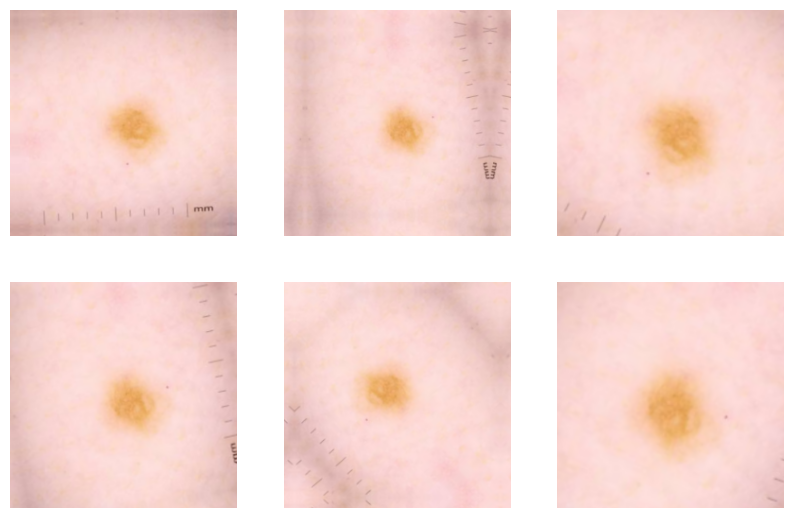

In [52]:
plt.figure(figsize=(10,10))
for images, _ in train_df.take(1):
  for i in range(6):
    augmented_img= data_aug(images)
    ax=plt.subplot(3, 3, i +1)
    plt.imshow(augmented_img[0].numpy().astype('uint8'))
    plt.axis('off')

In [53]:
model2 = Sequential([
  data_aug,
  layers.Rescaling(1./255),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(pool_size=(2, 2), padding="valid"),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.2),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(units=1,activation='sigmoid')
])

model2.compile(optimizer='adam', loss='binary_crossentropy',
              metrics=['accuracy'])

In [54]:
model2.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_1 (Sequential)   (None, 240, 240, 3)       0         
                                                                 
 rescaling_1 (Rescaling)     (None, 240, 240, 3)       0         
                                                                 
 conv2d_2 (Conv2D)           (None, 240, 240, 16)      448       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 120, 120, 16)     0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 120, 120, 32)      4640      
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 60, 60, 32)       0         
 2D)                                                  

In [55]:
epochs= 20
history_2= model2.fit(
    train_df,
    validation_data= val_df,
    epochs=epochs
)

Epoch 1/20
121/121 [==============================] - 15s 101ms/step - loss: 0.5584 - accuracy: 0.7387 - val_loss: 0.3654 - val_accuracy: 0.8454
Epoch 2/20
121/121 [==============================] - 12s 97ms/step - loss: 0.3739 - accuracy: 0.8362 - val_loss: 0.3603 - val_accuracy: 0.8390
Epoch 3/20
121/121 [==============================] - 12s 99ms/step - loss: 0.3386 - accuracy: 0.8558 - val_loss: 0.2858 - val_accuracy: 0.8808
Epoch 4/20
121/121 [==============================] - 12s 97ms/step - loss: 0.3252 - accuracy: 0.8657 - val_loss: 0.2810 - val_accuracy: 0.8876
Epoch 5/20
121/121 [==============================] - 12s 97ms/step - loss: 0.3212 - accuracy: 0.8647 - val_loss: 0.2898 - val_accuracy: 0.8803
Epoch 6/20
121/121 [==============================] - 12s 96ms/step - loss: 0.3070 - accuracy: 0.8719 - val_loss: 0.2996 - val_accuracy: 0.8835
Epoch 7/20
121/121 [==============================] - 12s 97ms/step - loss: 0.2997 - accuracy: 0.8704 - val_loss: 0.3000 - val_accuracy

Pada model dengan augmentasi saya sengaja memilih angka 20 karena saat epoch 10 itu nilainya masih sangat rendah. Tapi pas epoch 20 angkanya lebih baik

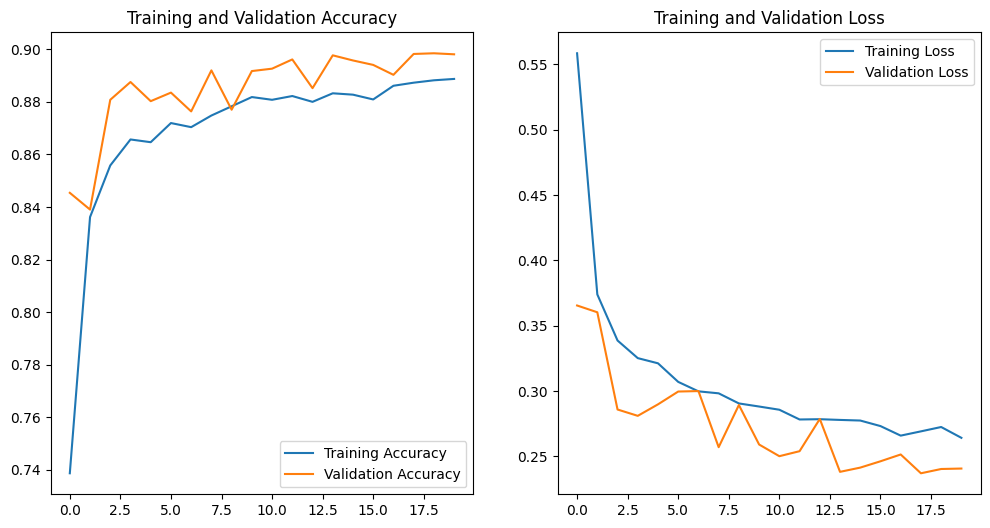

In [56]:
acc = history_2.history['accuracy']
val_acc = history_2.history['val_accuracy']

loss = history_2.history['loss']
val_loss = history_2.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [57]:
test_results_2 = model2.evaluate(test_df, verbose=0)
print(f'Test Loss     : {test_results_2[0]:.4f}')
print(f'Test Accuracy : {test_results_2[1]:.4f}')

Test Loss     : 0.2544
Test Accuracy : 0.8970


Model dengan augmentasi dan padding menunjukkan kemampuan yang baik dalam mengklasifikasikan kanker kulit menjadi benign atau malignant. Model ini tidak mengalami overfitting dengan akurasi yang hampir sama baik pada data latihan (train) maupun data uji (test), yaitu sekitar 0.8887 untuk train dan 0.8970 untuk test. Model ini memiliki potensi untuk meningkatkan deteksi dini kanker melanoma dan memberikan dampak positif dalam dunia medis.

## Model Transfer Learnig

Model transfer learning adalah model yang sudah di tranning yang akan kita buat ke model yang akan saya gunakan dan harusnya dari model transfer learning ini hasil runningnya lebih cepat karna kita menggunakan bobot yang sudah di train.

In [58]:
#transfer learnig
callbacks2 = [
    EarlyStopping(monitor='val_loss', patience= 3),
    ModelCheckpoint('model_best2.hdf5', monitor='val_loss', save_best_only=True)
]

pretrained_model = tf.keras.applications.Xception(include_top=False,
                                                  input_shape=inputs,pooling='avg')
pretrained_model.trainable = False

83683744/83683744 [==============================] - 5s 0us/step


- Dalam konteks penggunaan model ini pengaturan "include_top=False" artinya bahwa lapisan fully connected tidak akan disertakan dalam model. Selain itu, ketika saya mengatur "pretrained_model.trainable = False," ini artinya saya akan menggunakan bobot (weight) yang sudah ada dari model yang telah dilatih sebelumnya. Bobot ini tidak akan diubah atau dilatih ulang selama proses pelatihan model Anda yang baru.
Dan untuk nilai pooling saya input avg jadi menggunkan nilai rata-rata dari data dan untuk avg mungkin akan lebih lama saat kita running
- Pengunaan Xception menjadi lebih efisien secara komputasi dan membutuhkan lebih sedikit data untuk dilatih. Selain itu, Xception juga cenderung menghindari masalah overfitting, yang bisa terjadi ketika model menjadi terlalu "hafal" data latih dan tidak dapat mengenali data baru dengan baik.

In [59]:
model_tf= Sequential()
model_tf.add(pretrained_model)

#fully connected layer
model_tf.add(Flatten())
model_tf.add(Dense(128, activation='relu')),
model_tf.add(Dense(units=1,activation='sigmoid'))

In [60]:
model_tf.compile(optimizer='adam', loss='binary_crossentropy',
              metrics=['accuracy'])

In [61]:
model_tf.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 xception (Functional)       (None, 2048)              20861480  
                                                                 
 flatten_2 (Flatten)         (None, 2048)              0         
                                                                 
 dense_4 (Dense)             (None, 128)               262272    
                                                                 
 dense_5 (Dense)             (None, 1)                 129       
                                                                 
Total params: 21,123,881
Trainable params: 262,401
Non-trainable params: 20,861,480
_________________________________________________________________


Nilai paramnya 21.123.881 dari data transfer learning dan dari model kita makanya nilai paramnnya sangat besar.

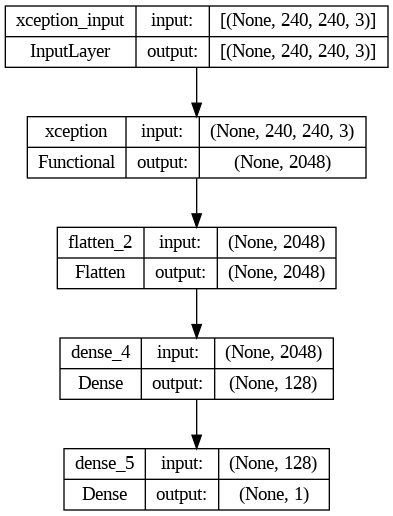

In [62]:
# Plot Layers
tf.keras.utils.plot_model(model_tf, show_shapes=True)

In [63]:
disepochs = 30
history_3 = model_tf.fit(
    train_df,
    validation_data=val_df,
    epochs=epochs,
    callbacks=callbacks2
)

Epoch 1/20
121/121 [==============================] - 84s 637ms/step - loss: 1.8454 - accuracy: 0.8060 - val_loss: 0.6611 - val_accuracy: 0.8261
Epoch 2/20
121/121 [==============================] - 69s 570ms/step - loss: 0.6866 - accuracy: 0.8256 - val_loss: 0.5847 - val_accuracy: 0.8546
Epoch 3/20
121/121 [==============================] - 68s 568ms/step - loss: 0.5653 - accuracy: 0.8483 - val_loss: 0.4924 - val_accuracy: 0.8648
Epoch 4/20
121/121 [==============================] - 75s 626ms/step - loss: 0.4011 - accuracy: 0.8667 - val_loss: 0.3307 - val_accuracy: 0.8731
Epoch 5/20
121/121 [==============================] - 68s 566ms/step - loss: 0.4108 - accuracy: 0.8641 - val_loss: 0.7758 - val_accuracy: 0.8036
Epoch 6/20
121/121 [==============================] - 68s 568ms/step - loss: 0.4278 - accuracy: 0.8617 - val_loss: 0.6726 - val_accuracy: 0.8360
Epoch 7/20
121/121 [==============================] - 73s 605ms/step - loss: 0.3955 - accuracy: 0.8702 - val_loss: 0.2992 - val_ac

In [64]:
# change to dataframe
metrics_h3 = pd.DataFrame(history_3.history)
metrics_h3

loss  accuracy  val_loss  val_accuracy
0   1.845440  0.805960  0.661107      0.826132
1   0.686582  0.825612  0.584715      0.854633
2   0.565334  0.848256  0.492434      0.864784
3   0.401142  0.866736  0.330652      0.873113
4   0.410752  0.864133  0.775831      0.803618
5   0.427808  0.861661  0.672585      0.836023
6   0.395547  0.870250  0.299189      0.894977
7   0.322637  0.880531  0.413242      0.831208
8   0.329173  0.876106  0.246658      0.902004
9   0.257357  0.896929  0.210796      0.914237
10  0.308835  0.885086  0.246554      0.898360
11  0.263600  0.892114  0.209058      0.913196
12  0.260601  0.896278  0.271289      0.884695
13  0.300160  0.881052  0.410155      0.857366
14  0.261299  0.896148  0.314060      0.878449

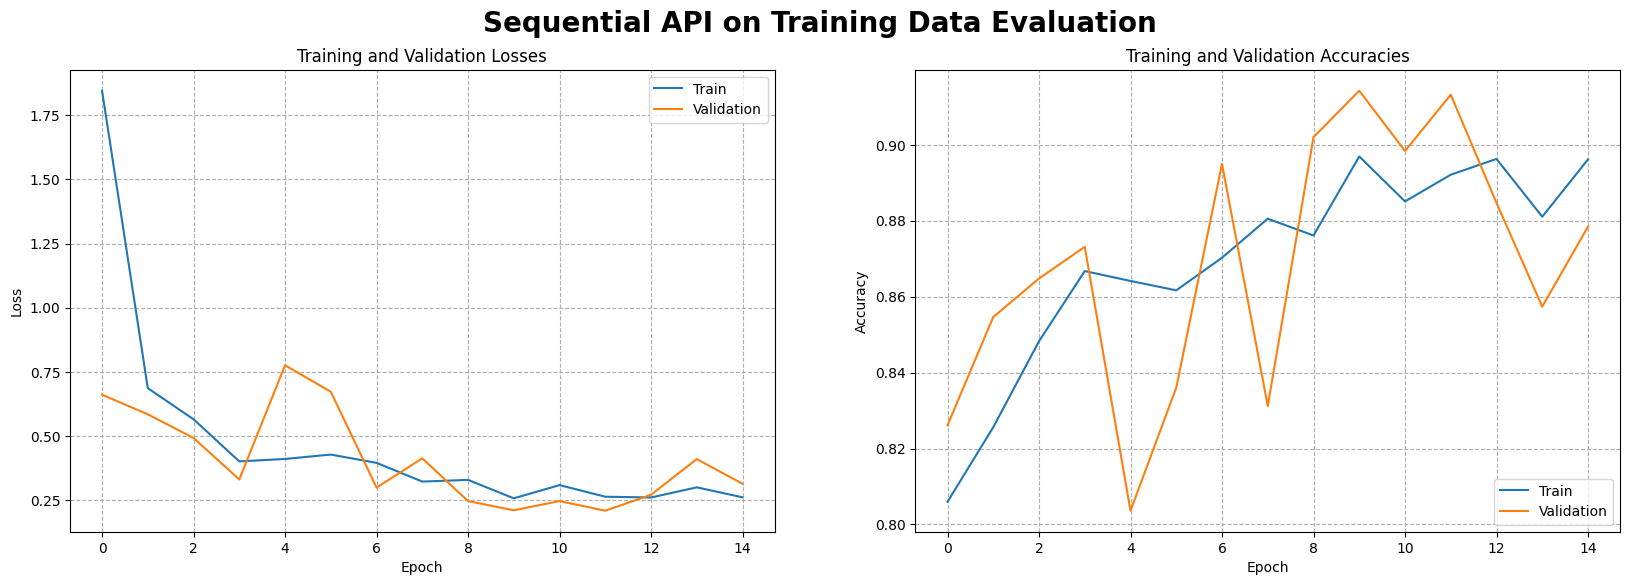

In [65]:
#Plot training & validation loss values
fig, ax = plt.subplots(1, 2, figsize=(20, 6))
fig.suptitle('Sequential API on Training Data Evaluation', fontsize=20, weight='bold')

plt.subplot(1, 2, 1)
plt.title("Training and Validation Losses", fontsize=12)
plt.plot(history_3.history['loss'])
plt.plot(history_3.history['val_loss'])
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.grid(linestyle='--')

# Plot training & validation accuracy values
plt.subplot(1, 2, 2)
plt.title("Training and Validation Accuracies", fontsize=12)
plt.plot(history_3.history['accuracy'])
plt.plot(history_3.history['val_accuracy'])
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='lower right')
plt.grid(linestyle='--')

plt.show()

Pada gradient yang mengalami "ekspoding" saat epoch ke-4, hal ini mengindikasikan bahwa dalam proses pelatihan model, nilai-gradien (gradient) dari bobot (weights) dalam model tumbuh secara eksponensial atau sangat cepat. Akibatnya, bobot-bobot dalam model menjadi sangat besar, yang dapat menyebabkan nilai-nilai numerik yang tidak terkendali.

Dalam kasus tersebut, dapat diamati bahwa meskipun akurasi meningkat mendekati 0.80 pada epoch ke-4, nilai akurasi pada epoch-epoch selanjutnya bisa menjadi tidak stabil atau bahkan menurun. Ini menandakan bahwa model mengalami kesulitan untuk melakukan pembelajaran yang efektif setelah epoch ke-4.

In [66]:
test_results_3 = model_tf.evaluate(test_df, verbose=0)
print(f'Test Loss     : {test_results_3[0]:.4f}')
print(f'Test Accuracy : {test_results_3[1]:.4f}')

Test Loss     : 0.3615
Test Accuracy : 0.8860


 model transfer learning mengalami overfitting ketika nilai akurasi pada data latihan (train) lebih besar daripada nilai akurasi pada data uji (test). Nilai akurasi train sebesar 0.91 dan akurasi test sebesar 0.88 menunjukkan adanya tanda-tanda overfitting.

In [67]:
train_results_3 = model_tf.evaluate(train_df, verbose=0)
print(f'Train Loss     : {train_results_3[0]:.4f}')
print(f'Train Accuracy : {train_results_3[1]:.4f}')

Train Loss     : 0.3141
Train Accuracy : 0.8784


In [68]:
val_results_3 = model_tf.evaluate(val_df, verbose=0)
print(f'Val Loss     : {val_results_3[0]:.4f}')
print(f'Val Accuracy : {val_results_3[1]:.4f}')

Val Loss     : 0.3141
Val Accuracy : 0.8784


Dari hasil output transfer learning nilai train dan testnya sama artinya modelnya bagus dan tidak

Model yang paling bagus ketika nilai test lebih besar dari train dimana saat pemodelan dengan augmentasi "model" nilai testnya 91 dan trainnya 88 bisa dikatakan best fit

# Applying the Model on Dataset (INFERENCE)

In [69]:
def prediction(file):
  img = tf.keras.utils.load_img(file, target_size=(240, 240))
  x = tf.keras.utils.img_to_array(img)

  plt.imshow(x.astype('uint8'))

  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model2.predict(images, batch_size=64)
  idx = np.argmax(classes)
  clas = ['benign','maligant']
  print('Prediction is a {}'.format(clas[idx]))

1/1 [==============================] - 0s 164ms/step
Prediction is a benign


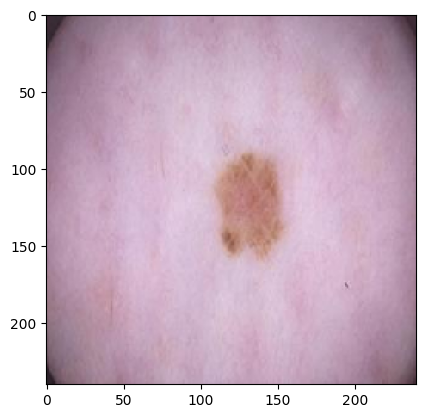

In [70]:
prediction('/content/melanoma_cancer_dataset/test/benign/melanoma_10000.jpg')

1/1 [==============================] - 0s 23ms/step
Prediction is a benign


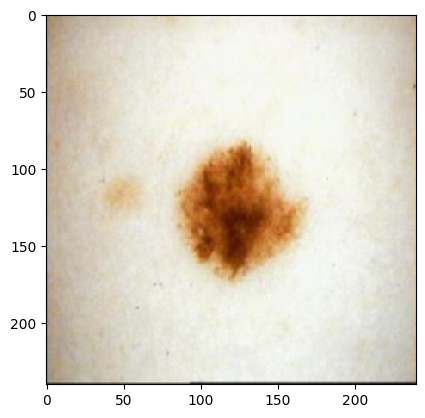

In [71]:
prediction('/content/melanoma_cancer_dataset/test/malignant/melanoma_10108.jpg')

Hasil prediksi dari model menggunakan model dengan augmentasi menunjukkan bahwa ini merupakan model terbaik dalam dataset ini. Namun, saat membuat prediksi untuk jenis penyakit malignant, terkadang model mengeluarkan hasil prediksi gambar benign. Kemungkinan ini disebabkan karena gambar-gambar penyakit benign dan malignant tidak memiliki perbedaan yang sangat mencolok. Meskipun model ini terbaik dalam dataset, hasil pemodelan tidak mencapai akurasi 100%.

Saving melanoma_10002.jpg to melanoma_10002.jpg


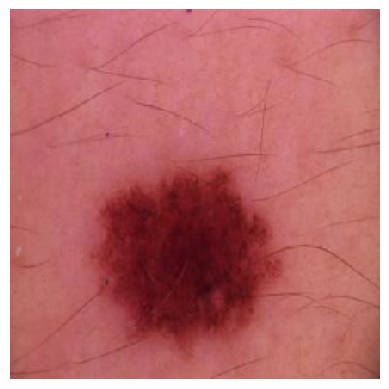

1/1 [==============================] - 0s 20ms/step
[[0.04684721]]
malignant


In [72]:
# Mempredikisi dengan cara lain
uploaded = files.upload()

for fn in uploaded.keys():

  # Prediksi dengan mengunggah gambar
  path = fn
  img =  tf.keras.utils.load_img(path, target_size=(img_height,img_width)) #harus sama dengan model kita
  plt.imshow(img)
  plt.axis('Off')
  plt.show()
  x = tf.keras.utils.img_to_array(img) # untuk ubah image kedalam array
  x = np.expand_dims(x, axis=0) #Memperluas bentuk array misal 1D jadi 2D, 0 berarti baris/horizontal [[1, 2]]

  images = np.vstack([x])
  classes = model2.predict(images) #gunakan model yang terbaik misal yg variable my_model untuk predict images
  print(classes)
  result_pred = tf.where(classes < 0.7, 0, 1)
  if result_pred == 1:
    print('benign')
  else:
    print('malignant')

Semakin tinggi nilai treshold maka semakin naik nilai precision dan begitu juga sebaliknyaa. Dan dengan kode ini bisa membaca gambar dengann benar dimana saat saya upload untuk malignant hasil outputnya juga malignant.

# VI. Save Model

In [73]:
model2.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_1 (Sequential)   (None, 240, 240, 3)       0         
                                                                 
 rescaling_1 (Rescaling)     (None, 240, 240, 3)       0         
                                                                 
 conv2d_2 (Conv2D)           (None, 240, 240, 16)      448       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 120, 120, 16)     0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 120, 120, 32)      4640      
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 60, 60, 32)       0         
 2D)                                                  

In [74]:
# Freeze Model

model2.trainable = False
model2.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_1 (Sequential)   (None, 240, 240, 3)       0         
                                                                 
 rescaling_1 (Rescaling)     (None, 240, 240, 3)       0         
                                                                 
 conv2d_2 (Conv2D)           (None, 240, 240, 16)      448       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 120, 120, 16)     0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 120, 120, 32)      4640      
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 60, 60, 32)       0         
 2D)                                                  

In [75]:
# Save Model
model2.save('model2.h5')

# VII. Conclusion & Suggestions

- Berdasarkan tujuan menggunakan Dataset Kanker Kulit Melanoma adalah untuk mengembangkan model deep learning yang akurat dalam mengklasifikasikan kanker kulit menjadi benign atau malignant. Dan dari hasil exploratory data analysis saya menampilkan gambar dari Tumor benign dan Tumor malignant dimana mayoritas orang dengan penyakit tumor memiliki jenis tumor benign, sekitar 52.1%. Meskipun tumor benign lebih umum, tetap perlu berhati-hati karena dapat menyebabkan masalah jika tumbuh besar atau menekan organ. Sebaliknya, sekitar 47.9% orang memiliki tumor malignant, yang merupakan jenis tumor kanker. Tumor kanker ini memiliki risiko lebih tinggi dan bisa menjadi serius jika tidak ditangani dengan baik. Penting untuk mendeteksi sejak dini dan mendapatkan perawatan yang tepat untuk meningkatkan kesembuhan.
- Model dengan augmentasi dan padding menunjukkan akurasi yang hampir sama baik pada data latihan (train) maupun data uji (test), yaitu sekitar 0.8887 untuk data train dan 0.8970 untuk data test. Hal ini menunjukkan bahwa model tersebut dapat melakukan generalisasi dengan baik pada data yang belum pernah dilihat sebelumnya dan tidak mengalami overfitting.
- Model ini dapat dianggap sebagai "best fit" atau model yang paling sesuai dengan data dan mampu menggeneralisasi dengan baik pada data baru. Model ini memiliki potensi untuk meningkatkan deteksi dini dan penanganan kanker melanoma, namun tetap perlu mempertimbangkan metrik evaluasi lain seperti presisi, recall, F1-score, atau kurva ROC, serta menggunakan data uji yang lebih besar dan teknik cross-validation untuk memastikan kehandalan model.
- Meskipun merupakan model terbaik dalam dataset ini, hasil prediksi model juga dapat mengalami kesalahan, terutama saat memprediksi jenis penyakit malignant yang kadang-kadang mengeluarkan hasil prediksi gambar benign. Kemungkinan ini disebabkan oleh kesamaan gambar-gambar dari penyakit benign dan malignant yang tidak terlalu berbeda.